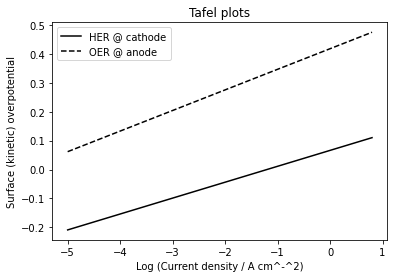

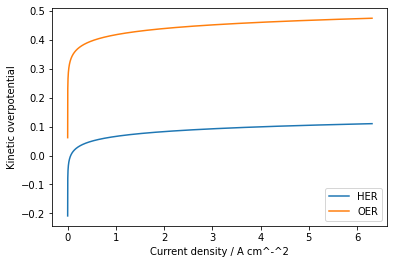

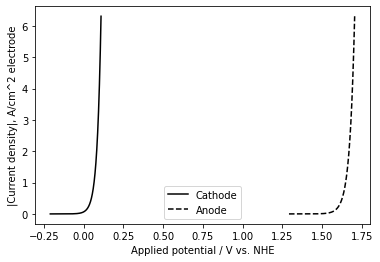

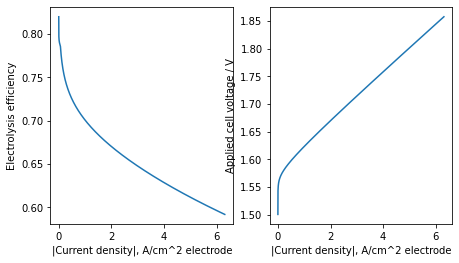

In [ ]:
#electrolyzer polarization curve generator

import numpy as np
from pdb import set_trace as tr
from matplotlib import pyplot as plt
import pandas as pd

#Generate electrolyzer iV curves to be used for further modeling elsewhere.

#clc; #clear screen

iv_curve = pd.DataFrame(columns = ['Current', 'Voltage'])
# data = {}

#Electrolyzer operating parameters and constants
U_O2=+1.23; #reversible potential for O2/H2O redox couple, V vs. NHE
# U_O2=+1.48; #reversible potential for O2/H2O redox couple, HHV
U_H2=0; #reversible potential for H+/H2 redox couple, V vs. NHE
U_cell=U_O2-U_H2; #reversible cell voltage, V

cond=120/1000; #electrolyte conductivity / S/cm #increase (120); 0.10 to 0.16 S/cm range
#https://www.osti.gov/servlets/purl/1091385
rho_m=1/cond; #electrolyte resistivity, Ohm-cm  
# t_m=0.18; #thickness of electrolyte / mm
# t_m = 0.254   #low           #low efficiency / mm
t_m = 0.05    #high                #high efficiency / mm    
#https://www.fuelcellearth.com/nafion-membrane-chart/

#electrocatalyst parameters
#____HER_cathode_catalyst______cathode
io_HER= 0.061538 # exchange current density A/cm2; prior: avg from lit; 80 C; 2e-4; 
m_HER= 0.055; #Tafel slope, V/dec; avg from lit - 60-80C
Acat_HER=20; #catalyst surface area, m^2 catalyst / grams catalyst (gcat)
HER_loading=0.5; #catalyst loading, mg/cm2 electrode
#b_HER=-m_HER*log10(io_HER); #intercept for Tafel plot

#____OER_cathode_catalyst______anode
io_OER= 2.6666666666667e-7 # exchange current density A/cm2 #avg of 60-80C frm literature
m_OER=0.0712; #Tafel slope, V/dec. #mean of values >=60 C
Acat_OER=25; #catalyst surface area, m^2 catalyst / grams catalyst (gcat)
OER_loading=2; #catalyst loading, mg/ cm2 electrode
#b_OER=-m_OER*log10(io_OER); #intercept for Tafel plot

i_e=np.logspace(-5,0.8,10000); #range of current density values to look at; values in A/cm2 electrode
i_OERcat=i_e/(OER_loading/1000)/(Acat_OER*(100^2)); #current densities normalized to catalysts surface area, A/cm2 catalyst
i_HERcat=i_e/(HER_loading/1000)/(Acat_HER*(100^2)); #current densities normalized to catalysts surface area, A/cm2 catalyst

#Use Tafel equation to plot eta vs. i_e for anode and cathode
eta_HER=m_HER*np.log10(i_HERcat/io_HER);  #HER overpotential / V
V_cathode=eta_HER+U_H2;  #applied potential for cathode / V vs. RHE
eta_OER=m_OER*np.log10(i_OERcat/io_OER); #OER overpotential / V
V_anode=eta_OER+U_O2;  #applied potential for cathode / V vs. RHE

#Calculate ohmic overpotential loss associated with membrane (increase to increase voltage)
eta_iR=i_e*(t_m/10)*rho_m; #ohmic overpotential / V 

#net overpotential losses
eta_kinetic=abs(eta_HER)+abs(eta_OER);

eta_net=abs(eta_HER)+abs(eta_OER)+eta_iR;
V_cell=V_anode-V_cathode+eta_iR; #total applied cell voltage across the 2 electrodes

efficiency=U_cell/(U_cell+eta_net); #electrolysis efficiency based on delta G


plt.figure(1)  #  Tafel plots
plt.plot(np.log10(i_e), eta_HER,'k', np.log10(i_e), eta_OER,'k--')
plt.title('Tafel plots')
plt.ylabel('Surface (kinetic) overpotential')
plt.xlabel('Log (Current density / A cm^-^2)')
plt.legend(['HER @ cathode','OER @ anode'])
# 
# 
plt.figure(2)   # eta_s vs. current density
plt.plot(i_e, eta_HER, i_e, eta_OER)
plt.ylabel('Kinetic overpotential')
plt.xlabel('Current density / A cm^-^2')
plt.legend(['HER','OER'])
# 

plt.figure(3)   #LSV curves versus applied potential
plt.plot(V_cathode, i_e, 'k-',V_anode, i_e,'k--')
plt.ylabel('|Current density|, A/cm^2 electrode')
plt.xlabel('Applied potential / V vs. NHE')
plt.legend(['Cathode','Anode'])

plt.figure(4)
#hold all
plt.subplot(1,2,1); plt.plot(i_e, efficiency)
plt.ylabel('Electrolysis efficiency')
plt.xlabel('|Current density|, A/cm^2 electrode')
#hold all
plt.subplot(1,2,2); plt.plot(i_e, V_cell)
plt.xlabel('|Current density|, A/cm^2 electrode')
plt.ylabel('Applied cell voltage / V')
plt.subplots_adjust(left=0.06, right=.99)

#export V-I data to excel:
#whos
#M=[i_e' V_cell']; #matrix of points to export
M = np.array([np.array(i_e), np.array(V_cell)])
M = M.T
# np.savetxt('electrolyzer_IV_curve', M, delimiter=',')
#xlswrite("electrolyzer_IV_curve.xlsx", M)
df = pd.DataFrame({"Current" : i_e, "Voltage" : V_cell})
df.to_csv("electrolyzer_IV_curve.csv", index=False)
plt.show() 

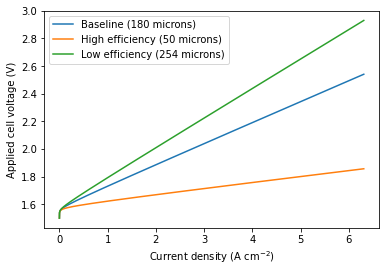

In [ ]:
#plot three curves
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv("electrolyzer_IV_curve.csv")
#csv contains all three iV curves

# Extract the x and y values for each curve from the DataFrame
x1 = data["x1"]
y1 = data["y1"]
x2 = data["x2"]
y2 = data["y2"]
x3 = data["x3"]
y3 = data["y3"]

# Create a new figure
fig, ax = plt.subplots()

# Plot each curve on the same figure
# t_m=0.18; #thickness of electrolyte / mm
# t_m = 0.254   #low           #low efficiency / mm
# t_m = 0.05    #high                #high efficiency / mm   

ax.set_ylabel("Applied cell voltage (V)")
ax.set_xlabel("Current density (A cm$^{-2}$)")
ax.plot(y1, x1, label="Baseline (180 microns)")
ax.plot(y2, x2, label="High efficiency (50 microns)")
ax.plot(y3, x3, label="Low efficiency (254 microns)")

# Add a legend to the plot
ax.legend()


# Save the figure to a high resolution jpeg file
plt.savefig("electrolyzer_IV_curve.jpg", dpi=300)

# Show the plot
plt.show()

In [ ]:
#CONSTANT AT 2 A/CM2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lcoh = []

ratio = []

t_v_max = []

M = pd.read_csv("electrolyzer_IV_curve_baseline.csv")
M = M[M['V_cell_op']<=2.9]

M = M[M['i_e_op']<=6]
# print('###########################', len(M))
V_cell_array=M.iloc[:,1]; # %cell voltage [=] V #full array of all iv curve

# Area = []

Scaling_factor = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10] #VRE:E ratio

Mix = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] #% wind

final_results = pd.DataFrame(columns = ['Scaling Factor', 'Gen Mix','LCOH', 'Total Hydrogen', 'Excess Power %','Excess'])

for factor in Scaling_factor:
    PV_kwh_solar = pd.read_csv("TX_solar_10MW_01Feb23.csv") 
    # PV_kwh_solar = pd.read_csv("Phoenix_10MW_tracking.csv") 
    PV_kwh_solar = PV_kwh_solar.iloc[:,1]
    PV_kwh_solar = PV_kwh_solar*1000 #kW to watts
    # capacity_factor_solar = sum(PV_kwh_solar)*eta_c/(11000000*8760)
    # print('########################   Capacity Factor Solar', capacity_factor_solar, '##########################')
    PV_kwh_solar.max()
    
    PV_kwh_wind = pd.read_csv("TX_wind_10MW_01Feb23.csv") 
    # PV_kwh_wind = pd.read_csv("wind_10MW_AZ.csv") 
    print('###########################', factor)

    PV_kwh_wind = PV_kwh_wind.iloc[:,1]
    PV_kwh_wind = PV_kwh_wind*1000 #kW to watts
    # capacity_factor_wind = sum(PV_kwh_wind)*eta_c/(11000000*8760)
    
    # print('########################   Capacity Factor Wind', capacity_factor_wind, '##########################')
    PV_kwh_wind.max()
    wd_rate = 0.01 #1% DR
    sd_rate = 0.005 #0.5% DR
    
    for ratio in Mix:

      PV_kwh = PV_kwh_wind*ratio+PV_kwh_solar*(1-ratio)
      PV_kwh = PV_kwh*factor
      total_kwh = PV_kwh #+ wind_kwh
      total_kwh.max()
      print('###########################', ratio)
          
      data = {}
      
      DR=0.0000015; #0.0000015 V/hr; 0.15% microvolts/hr
      #low 0.0000005
      #high 0.000005
      # %degradation rate V/hr as percent of Vop.   \\  0.000015 V/hr is baseline value Michael has been using
      U_cell=1.48; 
      # %reversible cell potential for efficiency calculation [=] V
      eta_c=0.909090909090909090909
      # %electrolyzer/PV coupling efficiency and generation performance loss
      
      V_cell = 1.88653
      # V_cell = 1.669803 #high eff
      # V_cell = 2.009897 #low eff

      Jop_rated, Vop_rated = 2.0, 1.88653   #baseline
      # Jop_rated, Vop_rated = 2.0, 2.009897   #low
      # Jop_rated, Vop_rated = 2.0, 1.669803   #high

      #high: 2.0, 1.669803
      #low: 2.0, 2.009897

      P_cell=i_e*V_cell; # %electrolyzer power densities  [=] W/cm2
      P_max_rated = P_cell
      
      efficiency=100*U_cell/V_cell; # %electrolysis efficiency based on U_cell [=] %
      V_cell_hourly = []
      i_e_hourly = []

      Dis_R = 0.1
      years = 30
      
      OM = []
      mass = []
      mass_cf = []
      excess_power_year = []
      pv_power_year = []
      a_e = pd.DataFrame()
            
      # fig, (ax1) = plt.subplots(1, sharex=True)
      for year in range(1, years+1):
          if year == 11 or year == 21:
              print('##############  New Electrolyzer in Use   ####################')
              
              M = pd.read_csv("electrolyzer_IV_curve_baseline.csv")
              M = M[M['V_cell_op']<=2.9]
              M = M[M['i_e_op']<=6]
              V_cell_array=M.iloc[:,1]; # %cell voltage [=] V #full array of all iv curve
              i_e = 2.0
              # V_cell = 2.009897 #low eff
              V_cell = 1.88653
              # V_cell = 1.669803 #high eff
              #1.89
              P_cell=i_e*V_cell; # %electrolyzer power densities  [=] W/cm2              
              P_max_rated = P_cell
              
              efficiency=100*U_cell/V_cell; # %electrolysis efficiency based on U_cell [=] %

          PWF = (1 / (1 + Dis_R))**(year)
          print("Year:", year, "PWF:", PWF)
          
          t_inc_kwh=1
          
          N=len(PV_kwh)
          P_e = factor*(PV_kwh_wind*ratio*(1-wd_rate)**(year-1) + PV_kwh_solar*(1-ratio)*(1-sd_rate)**(year-1))
          P_max_PV_0 = max(total_kwh)                  
          P_max_PV=max(P_e)
          P_max_total=max(P_e) # %max PV power during year [=] W
  
          t = np.linspace(1, N*t_inc_kwh, N)
          
          A_e_max = (11000000*eta_c)/(2.0*1.88653) #A_e max baseline
          # A_e_max = (11000000*eta_c)/(2.0*1.669803) #A_e max
          # A_e_max = (11000000*eta_c)/(2.0*2.009897) #A_e max low eff

          # print("A_e_max:", A_e_max)
          Stack_cost_1kW = 473.92 #2020 USD 
          M_BOP_1kW = 150.10 #2020 USD 
          E_BOP_1kW = 130.48 #2020 USD 
          CAPEX_per_1kW = (Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW)
          # CAPEX_per_1kW = 1091.6 #high; corresponds to 1299 installed
          # CAPEX_per_1kW = 249.58 #low; corresponds to 1299 installed

          Installation_Factor = 1.19 #Installed CAPEX 
          CAPEX_per_1kW = CAPEX_per_1kW*Installation_Factor
          
          Electronics_percentage = 0.26 # cost increase

          # for electrical balance of plant and phase separator and dryers
          CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
          
          CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
          
          CAPEX_Rest_Total = CAPEX_Rest*A_e_max*Jop_rated*Vop_rated/1000
          
          if i_e > 2.0:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A_e_max*Jop_rated*Vop_rated/1000
            
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
          
          elif i_e <=2.0:
              
            CAPEX_Electronics_Total =  CAPEX_Electronics*A_e_max*Jop_rated*Vop_rated/1000
            
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
          #https://www.nrel.gov/docs/fy22osti/80694.pdf; 2024, moderate, market: https://atb.nrel.gov/electricity/2022/utility-scale_pv; https://atb.nrel.gov/electricity/2022/land-based_wind
          #$/W-dc; #solar + wind
          #solar = $1,000/kW; wind = $1200/kW
          
          # CAPEX_0 = Total_CAPEX + 1000*(11000000*factor/1000) #$1,000/kW *11 million watts*scaling factor/1000 watts per kW
          
          #baseline:
          CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)
          
          #high solar + high wind:
          # CAPEX_0 = Total_CAPEX + 1159*(11000000*factor*(1-ratio)/1000) + 1277.21*(11000000*factor*(ratio)/1000)

          #high solar:
          # CAPEX_0 = Total_CAPEX + 1159*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)

          #high wind:
          # CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 1277.21*(11000000*factor*(ratio)/1000)
                          
          #low solar:
          # CAPEX_0 = Total_CAPEX + 617.61*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)
          
          #low wind:
          # CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 700*(11000000*factor*(ratio)/1000)
          
          #low solar + low wind:
          # CAPEX_0 = Total_CAPEX + 617.61*(11000000*factor*(1-ratio)/1000) + 700*(11000000*factor*(ratio)/1000)
    
          # CAPEX_0 = 898*10000 + 1000*(10000000*factor/1000)
          if year == 11:
              CAPEX_10 = (Total_CAPEX/3)*PWF
              # CAPEX_10 = 449*10000*PWF
          elif year ==21:
              CAPEX_20 = (Total_CAPEX/3)*PWF
              # CAPEX_20 = 449*10000*PWF
          
          om = 0.05*CAPEX_0*PWF          
          OM.append(om)

          V_cell_op = []
          i_e_op = []
          A_e_op = []
          DeltaV = []
          
          excess_power = 0
          
          error = []
          pv_power = 0
          
          for j in range(N):  # % do this for each hour over the timeframe of interest
              A_e = (P_e[j]*eta_c)/(i_e*V_cell)

              # A_e = (P_e[j]*eta_c)/(2.0*1.88653)
              # A_e = (P_e[j]*eta_c)/(2.0*1.669803)
              A_e = np.where(A_e >= 2650368.67, 2650368.67, A_e)
              #So that higher PV input may not impact the design capacity of electrolyzer (10 MW)                  
                # A_e = 2650368.67 #baseline
                # A_e = 2261420.17  #loweff
                # A_e = 2994365.20 #higheff
              A_e_op.append(A_e)
              if j == 0:    
                next_highest_current = 2 #for 0th hr Jop = 2A/cm2
                i_e_op.append(next_highest_current)
                i_e = next_highest_current #updates i_e when in excess
              else:
                i_e_op.append(next_highest_current)
                i_e = next_highest_current    
              V_cell_op.append(V_cell)

              V_cell_hourly.append(V_cell)
              i_e_hourly.append(i_e_op[-1])
              
              M['V_cell_op'] = V_cell_array  #update voltage along entire IV curve  
              df = M #M is IV curve array
              
              if V_cell_op[-1]>=2.9:
                print('###############  V_cell_op = {}, exceeds the limit.\nThe value of i_e_op = {}'.format(V_cell_op[-1], i_e_op[-1]))
                df_filtered = df[df['V_cell_op'] < 2.9] 

                # Select the next highest current that corresponds with a voltage less than 2.9 volts
                next_highest_current = df_filtered['i_e_op'].max() 
              
                print("next highest current", next_highest_current)
              
              DeltaV.append(DR*V_cell_op[j])
  
              V_cell=V_cell+ DeltaV[j]; #updates voltage values for ONLY 2A/cm2
              V_cell_array=V_cell_array + DeltaV[j] #%updated voltage values for entire iV curve [=] V
              efficiency=100*U_cell/V_cell; # %updated efficiency values for entire iV curve [=] %
          
              P_cell=V_cell*i_e; # % new electrolyzer power density curves [=] W/cm2
              P_cell_op = np.multiply(V_cell_op,i_e_op) # new electrolyzer power [=] W
              P_cell_W = P_cell_op*A_e
              excess = P_e[j]*eta_c - P_cell_W[j]
              
              if excess > 0:
                  
                  excess_power+=excess
                  # print('####', 'excess: ', excess, j)
                  
              if  P_e[j]*eta_c>0:
                  
                  pv_power+=P_e[j]*eta_c
              # ax1.plot(i_e, V_cell_array)
              # ax1.set_xlabel('|Current density|, A/cm^2 electrode')
              # ax1.set_ylabel('Applied cell voltage / V')    
              # d=j/24  #counter days
              # j

          #     if j%1000 ==0: #every 168 hr
          #         ax1.plot(i_e, efficiency)
          #         ax2.plot(i_e, V_cell)
          #         ax1.set_xlabel('|Current density|, A/cm^2 electrode')
          #         ax1.set_ylabel('Electrolysis efficiency')
          #         ax2.set_xlabel('|Current density|, A/cm^2 electrode')
          #         ax2.set_ylabel('Applied cell voltage / V')    
          #     d=j/24  #counter days
          #     j
          # plt.show()
          excess_power_year.append(excess_power)
          pv_power_year.append(pv_power)
          a_e['{}'.format(year)] = A_e_op
          print('############# Excess power is {} at the end of year {}'.format(excess_power_year[-1], year))
          
          print('################ Percentage A_e used', (sum((P_e*eta_c)/(2.0*1.88))/(2650368.67*8760))*100)
          
          mul = i_e_op*np.array(A_e_op)
          mul_cf = 2.0*2650368.67 #A_e is constant in rated condition
          m_h2_cf = (mul_cf/(2*96485.3321))*(0.002*3600)
          m_h2 = (mul/(2*96485.3321))*(0.002*3600)
          
          m_total = sum(m_h2)*PWF
          print(m_total)
          
          mass.append(m_total)
                
      iv_df = {}
      iv_df["i"] = i_e_hourly
      iv_df["v"] = V_cell_hourly
      iv_df = pd.DataFrame(iv_df)
      iv_df.to_csv("hourly_iv_curve.csv")

      OPEX = 0    
      LCOH = (CAPEX_0+CAPEX_10+CAPEX_20+sum(OM)+OPEX)/sum(mass)
      
      data['Scaling Factor'] = factor
      print('###########  Scaling Factor', factor)
      data['Gen Mix'] = ratio
      
      print('############ Gen Mix', ratio)
      data['LCOH'] = LCOH
      
      print('######## LCOH', LCOH)
      data['Total Hydrogen'] =  sum(mass)
      
      print('###########  Total Hydrogen', sum(mass))
      data['Excess Power %'] = (sum(excess_power_year)/sum(pv_power_year))*100
      
      print('##########  Excess Power %', (sum(excess_power_year)/sum(pv_power_year))*100)
      data['Excess Power'] = sum(excess_power_year)
      
      print('########  Excess Power',  sum(excess_power_year))
    
      a_e.to_csv('electrolyzer_area.csv'.format(A_e_op))
      
      final_results = final_results.append(pd.DataFrame(data, index = [0]))
        
      final_results.to_csv('final_results_constant_i_e.csv')
      
      print('################# CAPEX_O:  {}, CAPEX_10: {}, CAPEX_20: {}, OM: {}, Mass: {}'.format(CAPEX_0, CAPEX_10, CAPEX_20, sum(OM), sum(mass)))

########################### 1.5
########################### 1
Year: 1 PWF: 0.9090909090909091
############# Excess power is 7807199122.8354225 at the end of year 1
################ Percentage A_e used 65.57558161620841
883053.0638726908
Year: 2 PWF: 0.8264462809917354


KeyboardInterrupt: ignored

Text(55.58333333333333, 0.5, 'Percentage of wind in VRE mix')

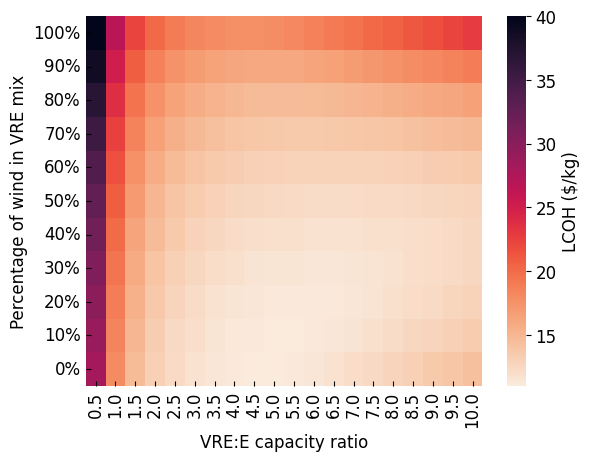

In [ ]:
#Heat map for LCOH - 12.16.22
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pdb import set_trace as tr

# data = pd.read_excel('heatmap-DATA.xlsx')
#data = pd.read_csv("heatmap-DATA_Tx_dynamic_kg.csv")
#df = pd.DataFrame(data)
#df = df.set_index('Unnamed: 0')
#dfx = df.copy()

# df = pd.read_csv('Final results_WA_constant_20Apr2023.csv')
df = pd.read_csv('Final results_WA_dynamic_07Feb2023.csv')
# df = pd.read_csv('final_results_dynamic_TX_18Dec2022.csv')
#final_results_constant_11Sept22_II.csv
# transforming df --> dft for plotting
dft = pd.DataFrame(dtype=float)
for col in df['Scaling Factor'].unique():
    #print(col)
    dft[str(col)] = df[df['Scaling Factor'] == col]['LCOH'].to_list()
dft.index = df['Gen Mix'].unique()
dft = dft.iloc[::-1]
#tr()

df = dft.copy() # reduntant; you could plot with dft instead

# for i in range(df.shape[0]):
#     df.iloc[i] = df.iloc[i].str.replace('$', '')
    
#df = pd.DataFrame(df, dtype = 'float')

## Change cmap to change the colormap. Other opetions can be uses in place of sns.cm.rocket_r. Just copy and paste other options (from comment sections) in place of sns.cm.rocket_r

cmap = sns.cm.rocket_r # sns.cm.rocket, 'Blues', 'Greens', 'PiYG', 'coolwarm', "YlGnBu"


ax = plt.axes()
ax.tick_params(direction='in') #make tick marks go in
# sns.heatmap(df, ax = ax, cmap = cmap, cbar_kws={'label': 'LCOH ($/kg)'})
sns.heatmap(df, ax=ax, cmap=cmap, vmin=11, vmax=40, cbar_kws={'label': 'LCOH ($/kg)'})
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('LCOH ($/kg)', fontsize=12)
cbar.ax.tick_params(labelsize=12)


#rotate y labels
ylabels = ax.get_yticklabels()
ax.set_yticklabels(ylabels, rotation=0,fontsize=12)
# Change the font size of the tick labels on both axes
ax.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)

###  Change Axis Label by editing 'X_axis Name' or 'Y_axis Name' below
plt.xlabel('VRE:E capacity ratio', fontsize=12) # x-axis label with fontsize 15
plt.ylabel('Percentage of wind in VRE mix', fontsize=12) # y-axis label with fontsize 15


### Uncomment the plt.savefig line to save the image
# plt.savefig('heatmap/default_heatmap.png')
#plt.show()

Text(55.58333333333333, 0.5, 'Percentage of wind in VRE mix')

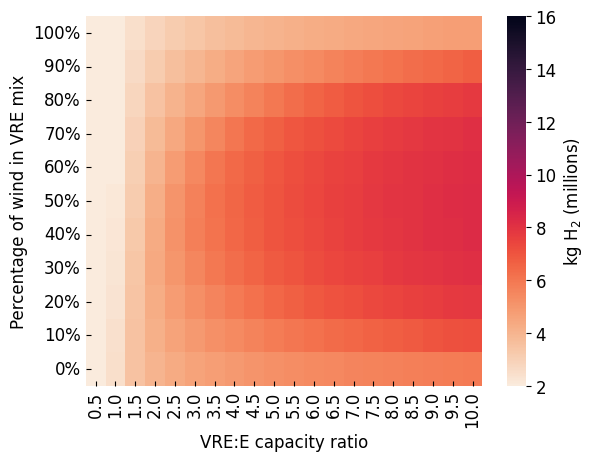

In [ ]:
#Heat map for kg - 12.16.22

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pdb import set_trace as tr

# data = pd.read_excel('heatmap-DATA.xlsx')
#data = pd.read_csv("heatmap-DATA_Tx_dynamic_kg.csv")
#df = pd.DataFrame(data)
#df = df.set_index('Unnamed: 0')
#dfx = df.copy()

df = pd.read_csv('Final results_WA_constant_20Apr2023.csv')
#final_results_constant_11Sept22_II.csv
df['Total Hydrogen'] /= 1e6
# transforming df --> dft for plotting
dft = pd.DataFrame(dtype=float)
for col in df['Scaling Factor'].unique():
    #print(col)
    dft[str(col)] = df[df['Scaling Factor'] == col]['Total Hydrogen'].to_list()
dft.index = df['Gen Mix'].unique()
dft = dft.iloc[::-1]
#tr()

df = dft.copy() # reduntant; you could plot with dft instead

# for i in range(df.shape[0]):
#     df.iloc[i] = df.iloc[i].str.replace('$', '')
    
#df = pd.DataFrame(df, dtype = 'float')

## Change cmap to change the colormap. Other opetions can be uses in place of sns.cm.rocket_r. Just copy and paste other options (from comment sections) in place of sns.cm.rocket_r

cmap = sns.cm.rocket_r # sns.cm.rocket, 'Blues', 'Greens', 'PiYG', 'coolwarm', "YlGnBu"


ax = plt.axes()

ax.tick_params(direction='in') #make tick marks go in
sns.heatmap(df, ax = ax, cmap = cmap, vmin=2, vmax=16, cbar_kws={'label': 'kg (millions)'})
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('kg H$_2$ (millions)', fontsize=12)
cbar.ax.tick_params(labelsize=12)

#rotate y labels
ylabels = ax.get_yticklabels()
ax.set_yticklabels(ylabels, rotation=0,fontsize=12)
# Change the font size of the tick labels on both axes
ax.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)

###  Change Axis Label by editing 'X_axis Name' or 'Y_axis Name' below
plt.xlabel('VRE:E capacity ratio', fontsize=12) # x-axis label with fontsize 15
plt.ylabel('Percentage of wind in VRE mix', fontsize=12) # y-axis label with fontsize 15

### Uncomment the plt.savefig line to save the image
# plt.savefig('heatmap/default_heatmap.png')
#plt.show()

Text(55.58333333333333, 0.5, 'Percentage of wind in VRE mix')

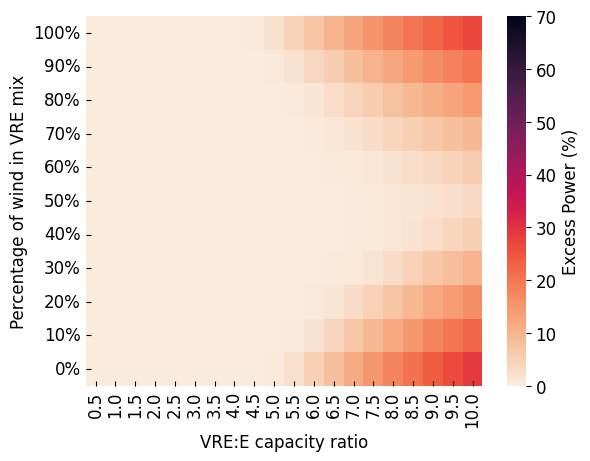

In [ ]:
#Heat map for excess power % - 12.21.22
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pdb import set_trace as tr

# data = pd.read_excel('heatmap-DATA.xlsx')
#data = pd.read_csv("heatmap-DATA_Tx_dynamic_kg.csv")
#df = pd.DataFrame(data)
#df = df.set_index('Unnamed: 0')
#dfx = df.copy()

df = pd.read_csv('Final results_WA_dynamic_07Feb2023.csv')
# df = pd.read_csv('final_results_constant_TX_17Dec2022.csv')
#final_results_constant_11Sept22_II.csv
# transforming df --> dft for plotting
dft = pd.DataFrame(dtype=float)
for col in df['Scaling Factor'].unique():
    #print(col)
    dft[str(col)] = df[df['Scaling Factor'] == col]['Excess Power %'].to_list()
dft.index = df['Gen Mix'].unique()
dft = dft.iloc[::-1]
#tr()

df = dft.copy() # reduntant; you could plot with dft instead

# for i in range(df.shape[0]):
#     df.iloc[i] = df.iloc[i].str.replace('$', '')
    
#df = pd.DataFrame(df, dtype = 'float')

## Change cmap to change the colormap. Other opetions can be uses in place of sns.cm.rocket_r. Just copy and paste other options (from comment sections) in place of sns.cm.rocket_r

cmap = sns.cm.rocket_r # sns.cm.rocket, 'Blues', 'Greens', 'PiYG', 'coolwarm', "YlGnBu"


ax = plt.axes()
ax.tick_params(direction='in') #make tick marks go in
# sns.heatmap(df, ax = ax, cmap = cmap, vmin=0, vmax=80, cbar_kws={'label': 'Excess Power (%)'})
sns.heatmap(df, ax=ax, cmap=cmap, vmin=0, vmax=70, cbar_kws={'label': 'Excess Power (%)'})
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Excess Power (%)', fontsize=12)
cbar.ax.tick_params(labelsize=12)

#rotate y labels
ylabels = ax.get_yticklabels()
ax.set_yticklabels(ylabels, rotation=0,fontsize=12)
# Change the font size of the tick labels on both axes
ax.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)

###  Change Axis Label as per your requirement by editing 'X_axis Name' or 'Y_axis Name' below
plt.xlabel('VRE:E capacity ratio', fontsize=12) # x-axis label with fontsize 15
plt.ylabel('Percentage of wind in VRE mix', fontsize=12) # y-axis label with fontsize 15

### Uncomment the plt.savefig line to save the image
# plt.savefig('heatmap/default_heatmap.png')
#plt.show()

i_e_max 6.0
v_e_max 2.494981763
########################### 5
########################### 0.8
Year: 1 PWF: 0.9090909090909091
############# Excess power is 2418777145.8790135 at the end of year 1
############ mass and year 2651181.604733955 1
Year: 2 PWF: 0.8264462809917354
############# Excess power is 1955028516.5875707 at the end of year 2
############ mass and year 2373687.552060962 2
Year: 3 PWF: 0.7513148009015777
############# Excess power is 1579817146.6816492 at the end of year 3
############ mass and year 2124400.9068964506 3
Year: 4 PWF: 0.6830134553650706
############# Excess power is 1251190909.8443043 at the end of year 4
############ mass and year 1900824.4482511845 4
Year: 5 PWF: 0.620921323059155
############# Excess power is 956809624.4328429 at the end of year 5
############ mass and year 1700455.5003450739 5
Year: 6 PWF: 0.5644739300537773
############# Excess power is 710619558.7572654 at the end of year 6
############ mass and year 1520828.4198085286 6
Year: 7 PWF

KeyboardInterrupt: ignored

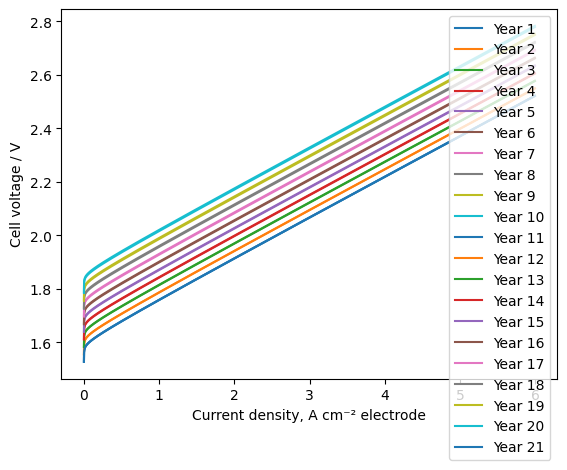

In [ ]:
#DYNAMIC, rated Jop is 2 A/cm2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lcoh = []

ratio = []

t_v_max = []
M = pd.read_csv("electrolyzer_IV_curve_baseline.csv")
# M = pd.read_csv("electrolyzer_IV_curve_higheff.csv")
#adjust iV max based on allowable range 
M = M[M['V_cell_op']<=2.9]
M = M[M['i_e_op']<=6]

# print('###########################', len(M))

# Area = []

A_e = 2650368.67  #baseline
# A_e = 2500000  #loweff
# A_e = 2994011.98 #higheff
# A_e = 2994365.20 #higheff

Capacity_factor = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
Mix = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# Capacity_factor = [0.5]

final_results = pd.DataFrame(columns = ['Scaling Factor', 'Gen Mix','LCOH', 'Total Hydrogen', 'Excess Power %','Excess'])

iv_max_list = pd.read_csv('electrolyzer_iv_max.csv')
i_e_max_ = list(iv_max_list["i_e_max"])
v_e_max_ = list(iv_max_list["v_e_max"])

for i in range(59,60): #for 6 A/cm2 max current; reduce this if max current is less

  i_e_max = i_e_max_[i]
  v_e_max = v_e_max_[i]
  print("i_e_max", i_e_max)
  print("v_e_max", v_e_max)

  for factor in Scaling_factor:

      PV_kwh_solar = pd.read_csv("TX_solar_10MW_01Feb23.csv") 
      PV_kwh_solar = PV_kwh_solar.iloc[:,1]
      PV_kwh_solar = PV_kwh_solar*1000 #kW to watts
      # capacity_factor_solar = sum(PV_kwh_solar)*eta_c/(11000000*8760)
      # print('########################   Capacity Factor Solar', capacity_factor_solar, '##########################')
      PV_kwh_solar.max()

      PV_kwh_wind = pd.read_csv("TX_wind_10MW_01Feb23.csv") 
      print('###########################', factor)

      PV_kwh_wind = PV_kwh_wind.iloc[:,1]
      PV_kwh_wind = PV_kwh_wind*1000 #kW to watts
      # capacity_factor_wind = sum(PV_kwh_wind)*eta_c/(11000000*8760)
      
      # print('########################   Capacity Factor Wind', capacity_factor_wind, '##########################')
      PV_kwh_wind.max()
      wd_rate = 0.01 #1% DR
      sd_rate = 0.005 #0.5% DR

      for ratio in Mix:

        PV_kwh = PV_kwh_wind*ratio+PV_kwh_solar*(1-ratio)
        
        PV_kwh = PV_kwh*factor
        total_kwh = PV_kwh #+ wind_kwh
        total_kwh.max()
        print('###########################', ratio)
            
        data = {}
        DR=0.0000015; #0.0000015 V/hr
      
        U_cell=1.48; 
        # %reversible cell potential for efficiency calculation [=] V
        eta_c=0.90909090909 
        # %electrolyzer/PV coupling efficiency
        
        i_e = M.iloc[:,0]
        V_cell=M.iloc[:,1]; # %cell voltage [=] V
        Jop_rated, Vop_rated = 2.0, 1.88653 #baseline
        # Jop_rated, Vop_rated = 2.0, 2.01 #loweff
        # Jop_rated, Vop_rated = 2.0, 1.67 #higheff
        
        P_cell=i_e*V_cell; # %electrolyzer power densities  [=] W/cm2
        
        P_max_E= P_cell.max() # %max. electrolyzer power density based on starting iV curve [=] W/cm2

        efficiency=100*U_cell/V_cell; # %electrolysis efficiency based on U_cell [=] %
      
        Dis_R = 0.1
        years = 30
        
        OM = []
        mass = []
        
        mass_cf = []
        excess_power_year = []
        pv_power_year = []
        a_e = pd.DataFrame()
        
        fig, (ax1) = plt.subplots(1, sharex=True)
        for year in range(1, years+1):
            if year == 11 or year == 21:
                print('##############  New Electrolyzer in Use   ####################')
                
                M = pd.read_csv("electrolyzer_IV_curve_baseline.csv")
                M = M[M['V_cell_op']<=2.9]
                M = M[M['i_e_op']<6]
                
                
                i_e = M.iloc[:,0]
                
                V_cell=M.iloc[:,1]; # %cell voltage [=] V
              
                P_cell=i_e*V_cell; # %electrolyzer power densities  [=] W/cm2
              
                P_max_E= P_cell.max() # %max. electrolyzer power density based on starting iV curve [=] W/cm2
                
                efficiency=100*U_cell/V_cell; # %electrolysis efficiency based on U_cell [=] %

            PWF = (1 / (1 + Dis_R))**(year)
            print("Year:", year, "PWF:", PWF)
            
            t_inc_kwh=1
            
            N=len(PV_kwh)

            P_e = factor*(PV_kwh_wind*ratio*(1-wd_rate)**(year-1) + PV_kwh_solar*(1-ratio)*(1-sd_rate)**(year-1))
            P_max_PV_0 = max(total_kwh)
          
            P_max_PV=max(P_e)
            P_max_total=max(P_e) # %max PV power during year [=] W
    
            t = np.linspace(1, N*t_inc_kwh, N)
            
            Stack_cost_1kW = 473.92 #2020 USD 
            M_BOP_1kW = 150.10 #2020 USD 
            E_BOP_1kW = 130.48 #2020 USD 
            CAPEX_per_1kW = (Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW)
            # CAPEX_per_1kW = 1091.6 #high; corresponds to 1299 installed
            # CAPEX_per_1kW = 249.58 #low; corresponds to 1299 installed

            Installation_Factor = 1.19 #Installed CAPEX 
            CAPEX_per_1kW = CAPEX_per_1kW*Installation_Factor

            Electronics_percentage = 0.26 # cost increase

            # for electrical balance of plant and phase separator and dryers
            
            CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
            
            CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
            
            CAPEX_Rest_Total = CAPEX_Rest*A_e*Jop_rated*Vop_rated/1000
            
            if i_e_max > 2.0:

              CAPEX_Electronics_Total = CAPEX_Electronics*A_e*i_e_max*v_e_max/1000
              
              Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            
            elif i_e_max <=2.0:
                
              CAPEX_Electronics_Total = CAPEX_Electronics*A_e*Jop_rated*Vop_rated/1000
              
              Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            #$/Watt-dc
            # CAPEX_0 = Total_CAPEX + 1000*(11000000*factor/1000)
            #baseline
            CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)
            
            #high solar + high wind
            # CAPEX_0 = Total_CAPEX + 1159*(11000000*factor*(1-ratio)/1000) + 1277.2*(11000000*factor*(ratio)/1000)
            
            #high solar
            # CAPEX_0 = Total_CAPEX + 1159*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)

            #high wind
            # CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 1277.2*(11000000*factor*(ratio)/1000)

            #low solar:
            # CAPEX_0 = Total_CAPEX + 617.61*(11000000*factor*(1-ratio)/1000) + 1257.2*(11000000*factor*(ratio)/1000)
            
            #low wind:
            # CAPEX_0 = Total_CAPEX + 1027.8*(11000000*factor*(1-ratio)/1000) + 700*(11000000*factor*(ratio)/1000)
            
            #  low wind and solar:
            # CAPEX_0 = Total_CAPEX + 617.61*(11000000*factor*(1-ratio)/1000) + 700*(11000000*factor*(ratio)/1000)
         
            if year == 11:
                CAPEX_10 = (Total_CAPEX/3)*PWF
                # CAPEX_10 = 449*10000*PWF
            elif year == 21:
                CAPEX_20 = (Total_CAPEX/3)*PWF
                # CAPEX_20 = 449*10000*PWF
            
            om = 0.05*CAPEX_0*PWF
                    
            OM.append(om)

            V_cell_op = []
            i_e_op = []
            A_e_op = []
            DeltaV = []
            
            excess_power = 0
            
            error = []
            pv_power = 0
            for j in range(N):  # % do this for each hour over the timeframe of interest
                
                Power_matching = abs(np.array(P_cell*A_e)-P_e[j]*eta_c)
                
                I = np.argmin(Power_matching)
                
                A_e_op.append(A_e)    
                i_e_op.append(i_e[I])
                V_cell_op.append(V_cell[I])
    
                df = {}
                df['i']=i_e_op
                df['v']=V_cell_op
                df = pd.DataFrame(df)
                if V_cell_op[-1]>=2.9:
                    print('###############  V_cell_op = {}, exceeds the limit.\nThe value of i_e_op = {}'.format(V_cell_op[-1], i_e_op[-1]))
                    t_v_max.append(year*365*24+j)
                    Power_matching = np.delete(Power_matching, I)
                    I = np.argmin(Power_matching)
                    V_cell_op[-1] = 0 # %operating cell voltage [=] V
                    i_e_op[-1] = 0 # %operating electrolyzer current density  [=] A/cm2
                    df = df[df['v']<=2.9]
                    i_e_op_max = np.array(df[df['v']==max(df['v'])]['i'])[0] #max current
                    i_e_op[-1]=i_e_op_max
            
                DeltaV.append(DR*V_cell_op[j])
          
                V_cell=V_cell+ DeltaV[j]; # %updated voltage values for entire iV curve [=] V
                
                if V_cell[j]>2.9:
                    print('#################### Electrolyzer Dies at year {} and hour {}  ######################'.format(year, j))
                    break
                
                efficiency=100*U_cell/V_cell; # %updated efficiency values for entire iV curve [=] %
            
            
                P_cell=V_cell*i_e; # % new electrolyzer power density curves [=] W/cm2
                P_cell_op = np.multiply(V_cell_op,i_e_op) # new electrolyzer power [=] W
                P_cell_W = P_cell_op*A_e
                excess =P_e[j]*eta_c - P_cell_W[j]
              
                if excess > 0:
                    
                    excess_power+=excess
                    # print('####', 'excess: ', excess, j)
                    
                if  P_e[j]*eta_c>0:
                    
                    pv_power+=P_e[j]*eta_c

            if N % 10 == 0:
                ax1.plot(i_e, V_cell, label='Year {}'.format(str(year)))
                ax1.legend()
                ax1.set_xlabel('Current density, A cm\u207B\u00B2 electrode')
                ax1.set_ylabel('Cell voltage / V')

            excess_power_year.append(excess_power)
            pv_power_year.append(pv_power)
            a_e['{}'.format(year)] = A_e_op
            print('############# Excess power is {} at the end of year {}'.format(excess_power_year[-1], year))
            
            mul = A_e*np.array(i_e_op)
            mul_cf = 2.0*np.array(A_e_op) #A_e is constant here
            m_h2_cf = (mul_cf/(2*96485.3321))*(0.002*3600)
            m_h2 = (mul/(2*96485.3321))*(0.002*3600)
            
            m_total = sum(m_h2)*PWF
            m_total_cf = sum(m_h2_cf)*PWF
            print('############ mass and year', m_total, year) # m_total is cummulative hydrogen
            mass.append(m_total)
            mass_cf.append(m_total_cf)
            
        print('###################### Capacity Factor Based Total Hydrogen %', sum(mass)/sum(mass_cf)*100)
        
        plt.show()  #plot all year iV curves
        OPEX = 0    
        LCOH = (CAPEX_0+CAPEX_10+CAPEX_20+sum(OM)+OPEX)/sum(mass)
        
        data['Scaling Factor'] = factor
        print('###########  Scaling Factor', factor)
        data['Gen Mix'] = ratio
        
        print('############ Gen Mix', ratio)
        data['LCOH'] = LCOH
        
        print('######## LCOH', LCOH)
        data['Total Hydrogen'] =  sum(mass)
        
        print('###########  Total Hydrogen', sum(mass))
        data['Excess Power %'] = (sum(excess_power_year)/sum(pv_power_year))*100
        
        print('##########  Excess Power %', (sum(excess_power_year)/sum(pv_power_year))*100)
        data['Excess Power'] = sum(excess_power_year)
        
        print('########  Excess Power',  sum(excess_power_year))
        
        
        a_e.to_csv('electrolyzer_area.csv'.format(A_e_op))
        
        final_results = final_results.append(pd.DataFrame(data, index = [0]))
          
        final_results.to_csv('final_results_dynamic_i_e.csv')
        
        print("CAPEX", CAPEX_per_1kW)
        print('################# CAPEX_O:  {}, CAPEX_10: {}, CAPEX_20: {}, OM: {}, Mass: {}'.format(CAPEX_0, CAPEX_10, CAPEX_20, sum(OM), sum(mass)))
        

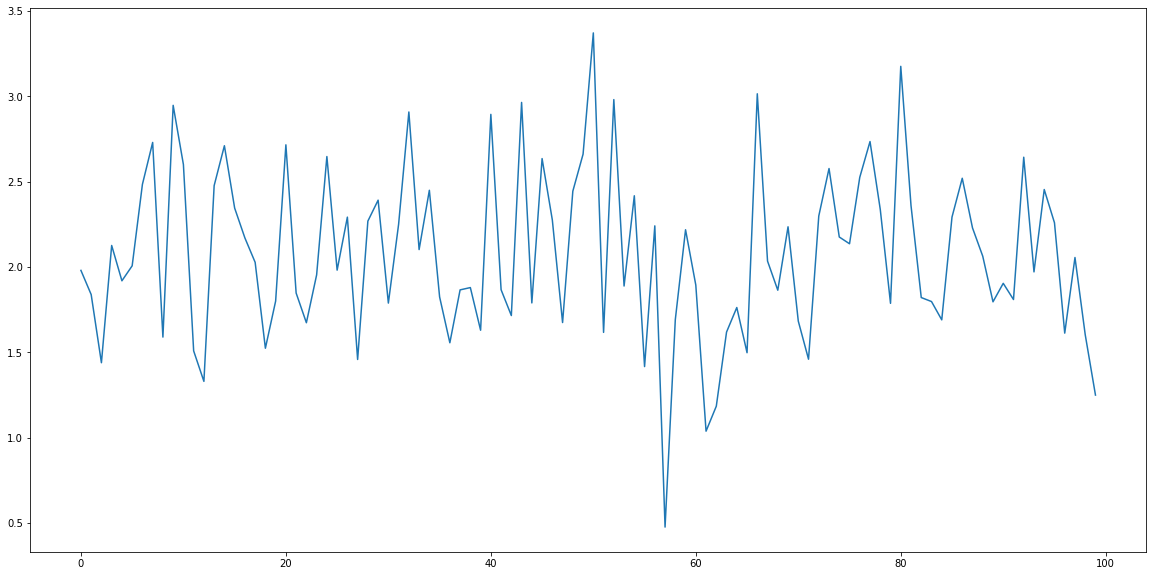

In [ ]:
#current density over time
plt.figure(figsize=(20,10))
plt.plot(i_e_op)
# plt.plot(m_h2)
# plt.xlabel('A_e')
# plt.ylabel('i_e_op')
plt.show()

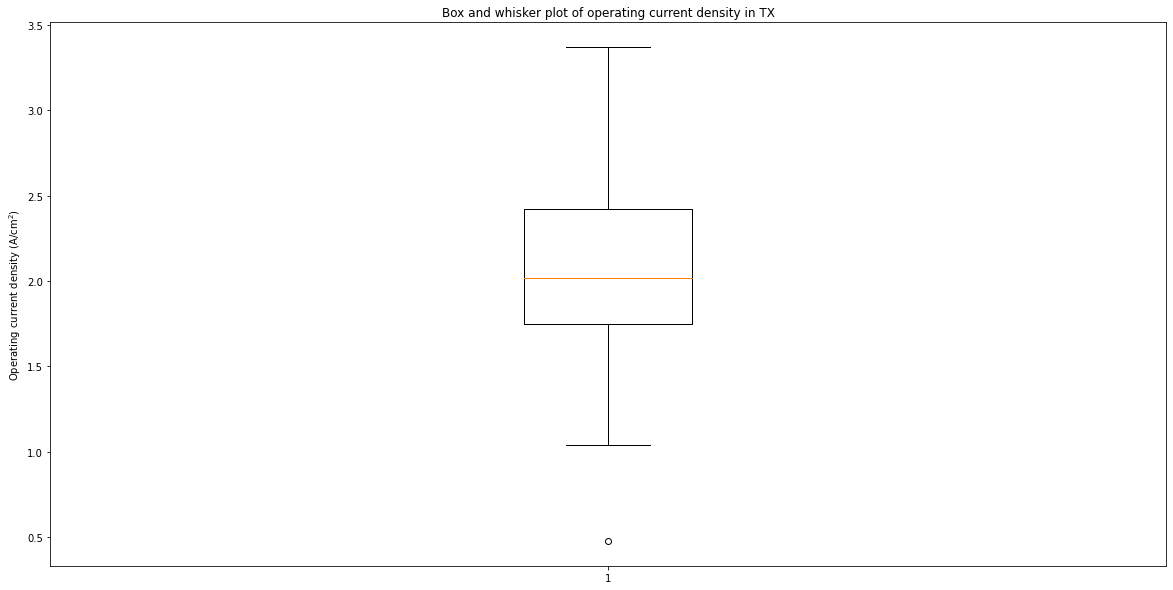

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some random data for demonstration
i_e_op = np.random.normal(loc=2.0, scale=0.5, size=100)

plt.figure(figsize=(20,10))

# create the box and whisker plot
plt.boxplot(i_e_op)

# plt.xlabel('TX')
plt.ylabel('Operating current density (A/cm$^2$)')
plt.title('Box and whisker plot of operating current density in TX')
plt.show()


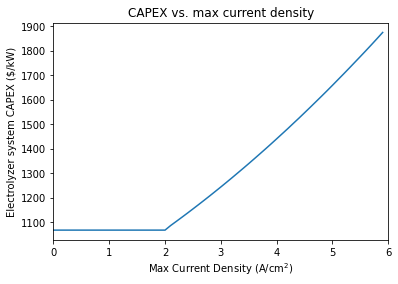

In [ ]:
#display CAPEX v current density
import matplotlib.pyplot as plt
import pandas as pd

A_e = 2650368.67  # baseline
iv_max_list = pd.read_csv('electrolyzer_iv_max.csv')
i_e_max_ = list(iv_max_list["i_e_max"])
v_e_max_ = list(iv_max_list["v_e_max"])

Stack_cost_1kW = 473.92 # 2020 USD 
M_BOP_1kW = 150.10 # 2020 USD 
E_BOP_1kW = 130.48 # 2020 USD 
CAPEX_per_1kW = (Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW)
CAPEX_per_1kW = CAPEX_per_1kW
Installation_Factor = 1.19 # Installed CAPEX 
CAPEX_per_1kW = CAPEX_per_1kW*Installation_Factor

Electronics_percentage = 0.26 # cost increase
CAPEX_Electronics = Electronics_percentage * CAPEX_per_1kW
CAPEX_Rest = (1 - Electronics_percentage) * CAPEX_per_1kW
Jop_rated, Vop_rated = 2.0, 1.88653 # baseline

# Create empty lists to store values for plotting
max_current_density = []
CAPEX = []

for i in range(0, 60):
    i_e_max = i * 0.1 # increment by 0.1 A/cm2
    if i_e_max > 2.0:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * i_e_max * v_e_max[i] / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    else:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * Jop_rated * Vop_rated / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    # Append values to respective lists
    max_current_density.append(i_e_max)
    CAPEX.append(Total_CAPEX/10000)

# Plot the data
plt.plot(max_current_density, CAPEX)
plt.xlabel('Max Current Density (A/cm$^2$)')
plt.ylabel('Electrolyzer system CAPEX ($/kW)')
plt.title('CAPEX vs. max current density')
plt.xlim(0, 6)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

A_e = 2650368.67  # baseline
iv_max_list = pd.read_csv('electrolyzer_iv_max.csv')
i_e_max_ = list(iv_max_list["i_e_max"])
v_e_max_ = list(iv_max_list["v_e_max"])

Stack_cost_1kW = 473.92 # 2020 USD 
M_BOP_1kW = 150.10 # 2020 USD 
E_BOP_1kW = 130.48 # 2020 USD 
CAPEX_per_1kW = (Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW)
# CAPEX_per_1kW = 1091.6 #high; corresponds to 1299 installed
# CAPEX_per_1kW = 249.58 #low; corresponds to 1299 installed

Installation_Factor = 1.19 # Installed CAPEX 
CAPEX_per_1kW = CAPEX_per_1kW*Installation_Factor

Electronics_percentage = 0.26 # cost increase
CAPEX_Electronics = Electronics_percentage * CAPEX_per_1kW
CAPEX_Rest = (1 - Electronics_percentage) * CAPEX_per_1kW
Jop_rated, Vop_rated = 2.0, 1.88653 # baseline

# Create empty lists to store values for plotting
max_current_density = []
CAPEX = []

for i in range(10, 11):
    i_e_max = i * 0.1 # increment by 0.1 A/cm2
    if i_e_max > 2.0:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * i_e_max * v_e_max_[i] / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    else:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * Jop_rated * Vop_rated / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    # Append values to respective lists
    max_current_density.append(i_e_max)
    CAPEX.append(Total_CAPEX/10000)

# Print the electrolyzer CAPEX at 1.7 A/cm2
print(f"The electrolyzer CAPEX at 1.7 A/cm2 is ${CAPEX[0]:,.2f}/kW")


The electrolyzer CAPEX at 1.7 A/cm2 is $1,068.45/kW


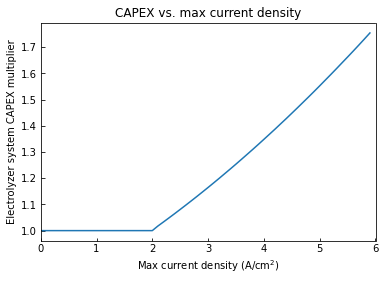

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

A_e = 2650368.67  # baseline
iv_max_list = pd.read_csv('electrolyzer_iv_max.csv')
i_e_max_ = list(iv_max_list["i_e_max"])
v_e_max_ = list(iv_max_list["v_e_max"])

Stack_cost_1kW = 473.92 # 2020 USD 
M_BOP_1kW = 150.10 # 2020 USD 
E_BOP_1kW = 130.48 # 2020 USD 
CAPEX_per_1kW = (Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW)
CAPEX_per_1kW = CAPEX_per_1kW
Installation_Factor = 1.19 # Installed CAPEX 

Electronics_percentage = 0.26 # cost increase
CAPEX_Electronics = Electronics_percentage * CAPEX_per_1kW
CAPEX_Rest = (1 - Electronics_percentage) * CAPEX_per_1kW
Jop_rated, Vop_rated = 2.0, 1.88653 # baseline

# Calculate baseline CAPEX value at 2 A/cm2
CAPEX_baseline = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 +
                 CAPEX_Electronics * A_e * Jop_rated * Vop_rated / 1000) * Installation_Factor

# Create empty lists to store values for plotting
max_current_density = []
CAPEX_multiplier = []

for i in range(0, 60):
    i_e_max = i * 0.1 # increment by 0.1 A/cm2
    if i_e_max > 2.0:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * i_e_max * v_e_max[i] / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    else:
        CAPEX_Electronics_Total = CAPEX_Electronics * A_e * Jop_rated * Vop_rated / 1000
        Total_CAPEX = (CAPEX_Rest * A_e * Jop_rated * Vop_rated / 1000 + CAPEX_Electronics_Total) * Installation_Factor
    # Append values to respective lists
    max_current_density.append(i_e_max)
    CAPEX_multiplier.append(Total_CAPEX / CAPEX_baseline)

# Plot the data
plt.plot(max_current_density, CAPEX_multiplier)
plt.xlabel('Max current density (A/cm$^2$)')
plt.ylabel('Electrolyzer system CAPEX multiplier')
plt.title('CAPEX vs. max current density')
plt.xlim(0, 6)
plt.tick_params(axis='both', direction='in')
plt.show()


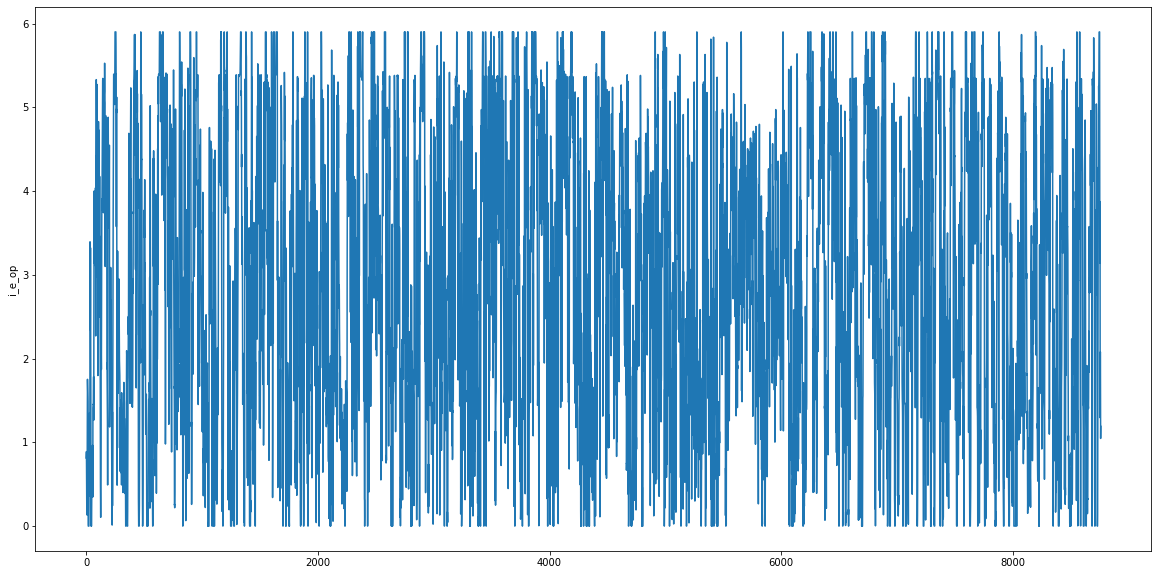

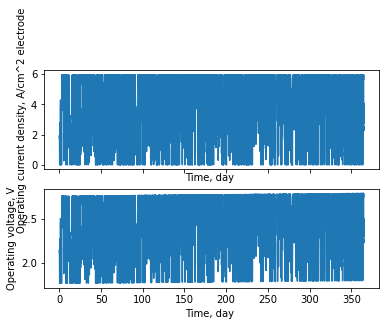

In [ ]:
if j%168 ==0:
        
  ax1.plot(i_e, efficiency)
  ax2.plot(i_e, V_cell)
  ax1.set_xlabel('|Current density|, A/cm^2 electrode')
  ax1.set_ylabel('Electrolysis efficiency')
  ax2.set_xlabel('|Current density|, A/cm^2 electrode')
  ax2.set_ylabel('Applied cell voltage / V')
        
        
  d=j/24  #counter days
  j
  
plt.show()

# print('############  Max value', )
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(t/24,i_e_op)
ax1.set_ylabel('Operating current density, A/cm^2 electrode')
ax1.set_xlabel('Time, day ')

ax2.plot(t/24,V_cell_op)
ax2.set_ylabel('Operating voltage, V')
ax2.set_xlabel('Time, day ')
plt.show()